Created on Fri Sep  8 10:00:36 2017

@author: USER

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
#global plot params
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['axes.linewidth'] = 2.5

Currently configured for SPT0538-50
In the future, should probably streamline to accomodate list of sources

In [10]:
#for obs flux points
obsflux = pd.read_csv('/Volumes/SML/ObsCos/CIGALE_SPT_data/SPT0538-50/0538_addedphot.tsv', delimiter = '\t', header=0)
obs_wavelength = np.array([100, 160, 250, 350, 500, 870, 1400, 2000, 1.43e5, 5.45e4, 3.33e4, 9797.14, 9140, 8565.5]) #um
flux = [obsflux['PACS_green'], obsflux['PACS_red'], obsflux['PSW'], obsflux['PMW'], 
        obsflux['PLW'], obsflux['LABOCA'], obsflux['SPT14'], obsflux['SPT20'], 
        obsflux['ATCA21'], obsflux['ATCA55'], obsflux['ATCA9'],  obsflux['cont30.6'], 
        obsflux['cont32.8'], obsflux['cont35']]
err = [obsflux['PACS_green_err'], obsflux['PACS_red_err'], obsflux['PSW_err'], 
       obsflux['PMW_err'], obsflux['PLW_err'], obsflux['LABOCA_err'], obsflux['SPT14_err'], 
       obsflux['SPT20_err'], obsflux['ATCA21_err'], obsflux['ATCA55_err'], 
       obsflux['ATCA9_err'],  obsflux['cont30.6_err'], obsflux['cont32.8_err'], 
       obsflux['cont35_err']]



#for CIGALE SED components
dat = fits.open('/Volumes/SML/ObsCos/CIGALE_SPT_data/SPT0538-50/without nebular/SPT0538-50_best_model.fits')
dat_data = dat[1].data
total_flux = dat_data['Fnu'] #mJy
wavelengths = dat_data['wavelength'] *1e-3 #um
conversion = dat_data['wavelength'] * (1/(4*np.pi*float(dat[1].header['universe.luminosity_distance'])**2)) * (dat_data['wavelength']/(3e17)) * (1e26) * 1000

radioflux = dat_data['radio_nonthermal']
radio_flux = radioflux * conversion 

stellarold = dat_data['stellar.old']
stellar_old = stellarold * conversion
stellaryoung = dat_data['stellar.young']
stellar_young = stellaryoung * conversion
total_stellar = stellar_old + stellar_young

attenuationstellarold = dat_data['attenuation.stellar.old']
attenuation_stellar_old = attenuationstellarold * conversion
attenuationstellaryoung = dat_data['attenuation.stellar.young']
attenuation_stellar_young = attenuationstellaryoung * conversion
total_attenuation = attenuation_stellar_young + attenuation_stellar_old

dustUminUmin = dat_data['dust.Umin_Umin']
dustminmin = dustUminUmin * conversion
dustUminUmax = dat_data['dust.Umin_Umax']
dustminmax = dustUminUmax * conversion
total_dust = dustminmin + dustminmax


agntherm = dat_data['agn.fritz2006_therm']
agn_therm = agntherm * conversion
agnscatt = dat_data['agn.fritz2006_scatt']
agn_scatt = agnscatt * conversion
agnagn = dat_data['agn.fritz2006_agn']
agn_agn = agnagn * conversion
total_agn = agn_agn + agn_scatt + agn_therm



In [15]:
datt = fits.open('/Volumes/SML/ObsCos/CIGALE_SPT_data/SPT0538-50/without nebular/results.fits')

In [17]:
datt[1].data['bayes.radio.alpha'], datt[1].data['bayes.radio.alpha_err']

(array([0.80372176]), array([0.09351257]))

In [ ]:
#plot
plt.figure(figsize=(20,10))
plt.plot(wavelengths, total_attenuation + total_stellar, color='orange', label='Stellar Attenuated')
plt.plot(wavelengths, total_stellar, color='blue', label='Stellar Unattenuated')
plt.plot(wavelengths, total_dust, color='red', label='Dust Emission')
plt.plot(wavelengths, total_agn, color='green', label='AGN Emission')
plt.plot(wavelengths, radio_flux, color='darkred', label='Radio Nonthermal')
plt.plot(wavelengths, total_flux, color='black', lw=3, label='Model Spectrum')
plt.scatter(obs_wavelength, flux, color='gray', marker='o', s=100, label='Observed Flux')
plt.errorbar(obs_wavelength, flux, yerr=err, color='gray', fmt='none', ls=None, label=None)

#residuals --> free-free
residuals = total_flux[2500:2800] - radio_flux[2500:2800] - total_dust[2500:2800]
plt.scatter(wavelengths[2500:2800], residuals)

#upper limits
plt.scatter([3.33e4], [0.225], color='orangered', marker='v', s=200, label='Upper Limits')

#plot parameters
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength [$\mu m$]', fontsize=25)
plt.ylabel('Flux [mJy]', fontsize=25)
plt.ylim([1e-1, 1e3])
plt.xlim([4e-1, 2e6])
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=4.5, width=2, which='minor')
plt.legend(loc='upper right', fontsize=10, frameon=False)
plt.title('SPT0538-50', fontsize=25)











Now tweaking CIGALE to include more nebular (ff) by decreasing AGN








In [34]:
#new 0538 fit
#for photometry
obsflux = pd.read_csv('/Volumes/SML/ObsCos/CIGALE_SPT_data/SPT0538-50/0538_addedphot.tsv', delimiter = '\t', header=0)
obs_wavelength = np.array([100, 160, 250, 350, 500, 870, 1400, 2000, 1.43e5, 5.45e4, 3.33e4, 9797.14, 9140, 8565.5]) #um
flux = [obsflux['PACS_green'], obsflux['PACS_red'], obsflux['PSW'], obsflux['PMW'], 
        obsflux['PLW'], obsflux['LABOCA'], obsflux['SPT14'], obsflux['SPT20'], 
        obsflux['ATCA21'], obsflux['ATCA55'], obsflux['ATCA9'],  obsflux['cont30.6'], 
        obsflux['cont32.8'], obsflux['cont35']]
err = [obsflux['PACS_green_err'], obsflux['PACS_red_err'], obsflux['PSW_err'], 
       obsflux['PMW_err'], obsflux['PLW_err'], obsflux['LABOCA_err'], obsflux['SPT14_err'], 
       obsflux['SPT20_err'], obsflux['ATCA21_err'], obsflux['ATCA55_err'], 
       obsflux['ATCA9_err'],  obsflux['cont30.6_err'], obsflux['cont32.8_err'], 
       obsflux['cont35_err']]

#CIGALE components
data = fits.open('/Volumes/SML/ObsCos/CIGALE_SPT_data/SPT0538-50/out/SPT0538-50_best_model.fits')


total_flux = data[1].data['Fnu'] #mJy
wavelengths = data[1].data['wavelength'] * 1e-3 #nm --> um
conversion = data[1].data['wavelength'] * (1/(4*np.pi*float(data[1].header['universe.luminosity_distance'])**2)) * (data[1].data['wavelength']/(3e17)) * (1e26) * 1000

radioflux = data[1].data['radio_nonthermal']
radio_flux = radioflux * conversion 

nebularcontold = data[1].data['nebular.continuum_old'] * conversion
nebularcontyoung = data[1].data['nebular.continuum_young'] * conversion
nebularcontold_att = data[1].data['attenuation.nebular.continuum_old'] * conversion
nebularcontyoung_att = data[1].data['attenuation.nebular.continuum_young'] * conversion
nebular_emission = nebularcontold + nebularcontyoung + nebularcontold_att + nebularcontyoung_att


nebularlinold = data[1].data['nebular.lines_old'] * conversion
nebularlinyoung = data[1].data['nebular.lines_young'] * conversion
nebular_lines = nebularlinold + nebularlinyoung

stellarold = data[1].data['stellar.old']
stellar_old = stellarold * conversion
stellaryoung = data[1].data['stellar.young']
stellar_young = stellaryoung * conversion
total_stellar = stellar_old + stellar_young

attenuationstellarold = data[1].data['attenuation.stellar.old']
attenuation_stellar_old = attenuationstellarold * conversion
attenuationstellaryoung = data[1].data['attenuation.stellar.young']
attenuation_stellar_young = attenuationstellaryoung * conversion
total_attenuation = attenuation_stellar_young + attenuation_stellar_old

dustUminUmin = data[1].data['dust.Umin_Umin']
dustminmin = dustUminUmin * conversion
dustUminUmax = data[1].data['dust.Umin_Umax']
dustminmax = dustUminUmax * conversion
total_dust = dustminmin + dustminmax


agntherm = data[1].data['agn.fritz2006_therm']
agn_therm = agntherm * conversion
agnscatt = data[1].data['agn.fritz2006_scatt']
agn_scatt = agnscatt * conversion
agnagn = data[1].data['agn.fritz2006_agn']
agn_agn = agnagn * conversion
total_agn = agn_agn + agn_scatt + agn_therm

Text(0.5,1,'SPT0538-50')

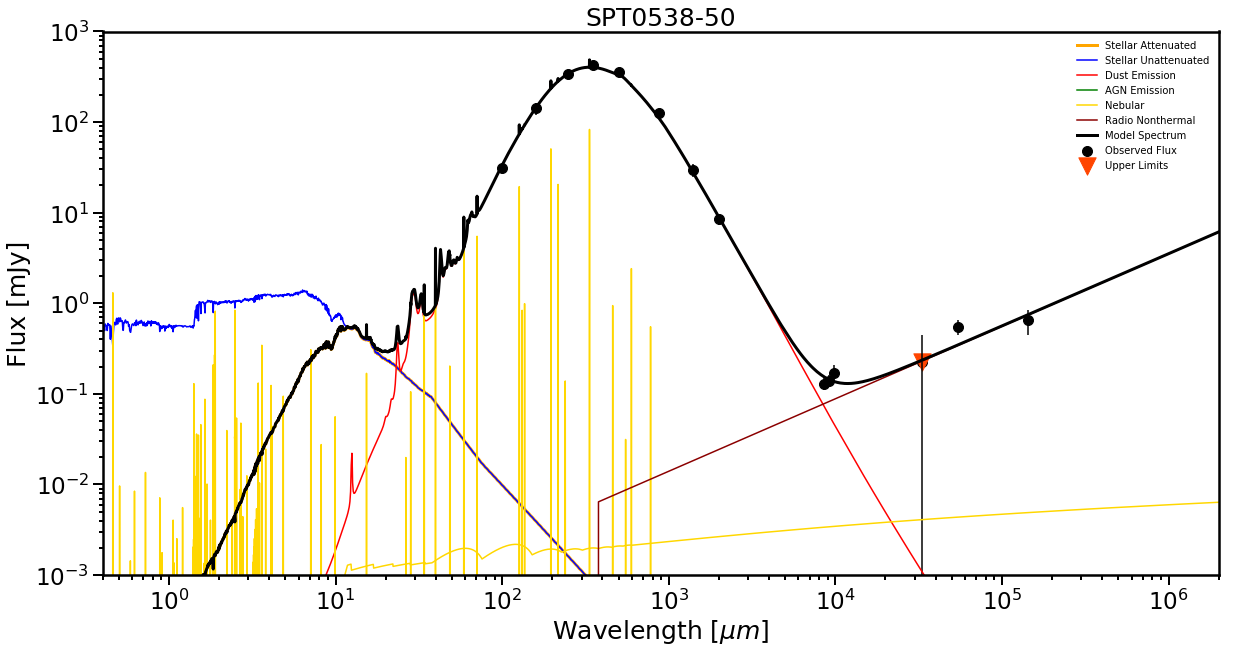

In [80]:
#plot
plt.figure(figsize=(20,10))
plt.plot(wavelengths, total_attenuation + total_stellar, color='orange', lw = 3, label='Stellar Attenuated')
plt.plot(wavelengths, total_stellar, color='blue', label='Stellar Unattenuated')
plt.plot(wavelengths, total_dust, color='red', label='Dust Emission')
plt.plot(wavelengths, total_agn, color='green', label='AGN Emission')
plt.plot(wavelengths, nebular_emission, color='gold', label='Nebular')
plt.plot(wavelengths, nebular_lines, color='gold', label=None)
plt.plot(wavelengths, radio_flux, color='darkred', label='Radio Nonthermal')
plt.plot(wavelengths, total_flux, color='black', lw=3, label='Model Spectrum')

plt.scatter(obs_wavelength, flux, color='black', marker='o', s=100, label='Observed Flux')
plt.errorbar(obs_wavelength, flux, yerr=err, color='black', fmt='none', ls=None, label=None)

#upper limits
plt.scatter([3.33e4], [0.225], color='orangered', marker='v', s=300, label='Upper Limits')

#alpha_T by eye
#plt.plot(wavelengths, (1e-3)*wavelengths**(0.12), color='purple')

#plot parameters
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength [$\mu m$]', fontsize=25)
plt.ylabel('Flux [mJy]', fontsize=25)
plt.ylim([1e-3, 1e3])
plt.xlim([4e-1, 2e6])
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=4.5, width=2, which='minor')
plt.legend(loc='upper right', fontsize=10, frameon=False)
plt.title('SPT0538-50', fontsize=25)

In [35]:
total_radio = radio_flux[2932:] + nebular_emission[2932:]

ff_fraction = np.divide(nebular_emission[2932:], total_radio)

lil detour to change wavelength to freq just for easy comparison
to Aravena+13

In [36]:
wav = data[1].data['wavelength'] #nm
wav_m = wav * 1e-9

freq = ((3.0e8) / wav_m) * 1e-9

And finally, Aravena+13 has rest frame freq but we have
obs freq, so need to convert using z

In [37]:
#From Aravena+13
#ff fraction for 0538 at 115.7 and 132.4 GHz, rest frame
restfreq = np.array([115.7, 132.4])

obsfreq = restfreq / (1 + 2.783)

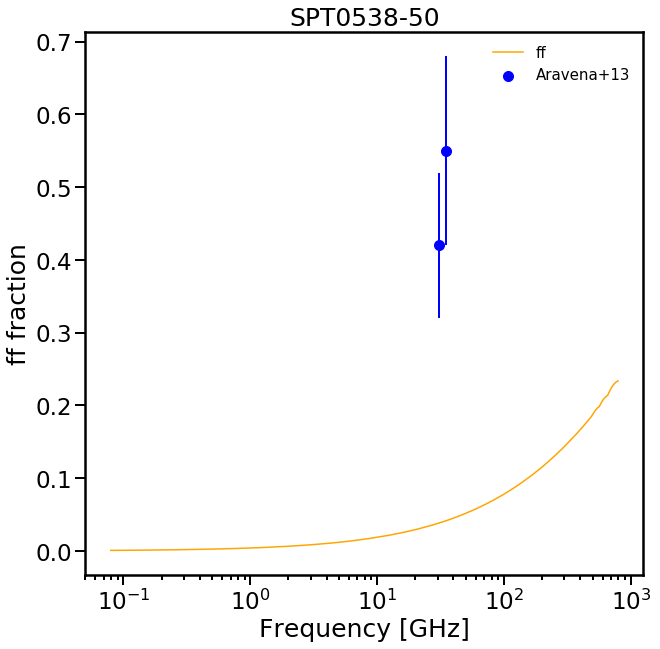

In [38]:
plt.figure(figsize=(10,10))
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['axes.linewidth'] = 2.5
plt.plot(freq[2932:], ff_fraction, color='orange', label='ff')

#Aravena points
plt.scatter(obsfreq, [.42, .55], color='blue', marker='o', s=100, label='Aravena+13')
plt.errorbar(obsfreq, [.42, .55], yerr=[.1, .13], fmt='none', ls=None, lw=2, color='blue', label=None)
#plot parameters
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency [GHz]', fontsize=25)
plt.ylabel('ff fraction', fontsize=25)
#plt.ylim([1e-1, 1e3])
#plt.xlim([4e-1, 2e6])
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=4.5, width=2, which='minor')
plt.legend(loc='upper right', fontsize=15, frameon=False)
plt.title('SPT0538-50', fontsize=25)


#plt.savefig('0538-50_ff.png')

In [20]:
datt2 = fits.open('/Volumes/SML/ObsCos/CIGALE_SPT_data/SPT0538-50/out/results.fits')

In [22]:
datt2[1].data['bayes.radio.qir'], datt2[1].data['bayes.radio.qir_err']

(array([2.28153231]), array([0.11407662]))

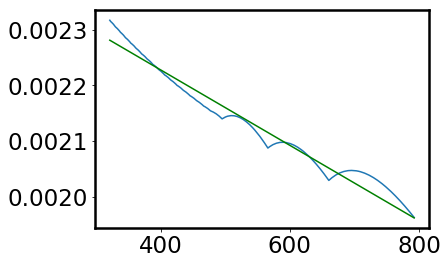

In [71]:
#fit curve to nebular continuum (ff) to get alpha_thermal (spectral index/slope for ff)
# get x and y vectors
wav = data[1].data['wavelength'] #nm
wav_m = wav * 1e-9

freq = ((3.0e8) / wav_m) * 1e-9
x = freq[2932:3200] #just start where synch > 0
y = nebular_emission[2932:3200]

# calculate polynomial
z = np.polyfit(x, y, 1)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 100)
y_new = f(x_new)

plt.plot(x,y)
plt.plot(x_new, y_new, 'green')
#plt.xlim([x[0]-1, x[-1] + 1 ])
#plt.ylim(1e-3, 1e-2)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

So turns out if we follow exactly what Aravena did and set alpha_NT closer to 1.0, it forces CIGALE to increase the level of nebular continuum emission

See below

In [3]:
data0538 = fits.open('/Volumes/SML/ObsCos/CIGALE_SPT_data/SPT0538-50/expandedqir_fixedalpha/SPT0538-50_best_model.fits')

In [4]:
dat0538 = data0538[1].data

In [5]:
data0538[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  192 / length of dimension 1                          
NAXIS2  =                 4868 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   24 / number of table fields                         
TTYPE1  = 'wavelength'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'nm      '                                                            
TTYPE2  = 'Fnu     '                                                            
TFORM2  = 'D       '        

In [3]:
data0538physparams = fits.open('/Volumes/SML/ObsCos/CIGALE_SPT_data/SPT0538-50/expandedqir_fixedalpha/results.fits')

In [13]:
data0538_physparams = data0538physparams[1].data

In [4]:
data0538physparams[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  778 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   97 / number of table fields                         
TTYPE1  = 'id      '                                                            
TFORM1  = '10A     '                                                            
TTYPE2  = 'bayes.radio.qir'                                                     
TFORM2  = 'D       '                                                            
TTYPE3  = 'bayes.radio.qir_e

In [6]:
conversion = dat0538['wavelength'] * (1/(4*np.pi*float(data0538[1].header['universe.luminosity_distance'])**2)) * (dat0538['wavelength']/(3e17)) * (1e26) * 1000


nebular = dat0538['nebular.continuum_old'] + dat0538['nebular.continuum_young']
radio = dat0538['radio_nonthermal']

In [7]:
total_radio = nebular + radio


wav = dat0538['wavelength'] #nm
wav_m = wav * 1e-9
freq = ((3.0e8) / wav_m) * 1e-9
restfreq = np.array([115.7, 132.4])
obsfreq = restfreq / (1 + 2.783)

In [8]:
ff_fraction = nebular[2932:] / total_radio[2932:]

Text(0.5,1,'SPT0538-50')

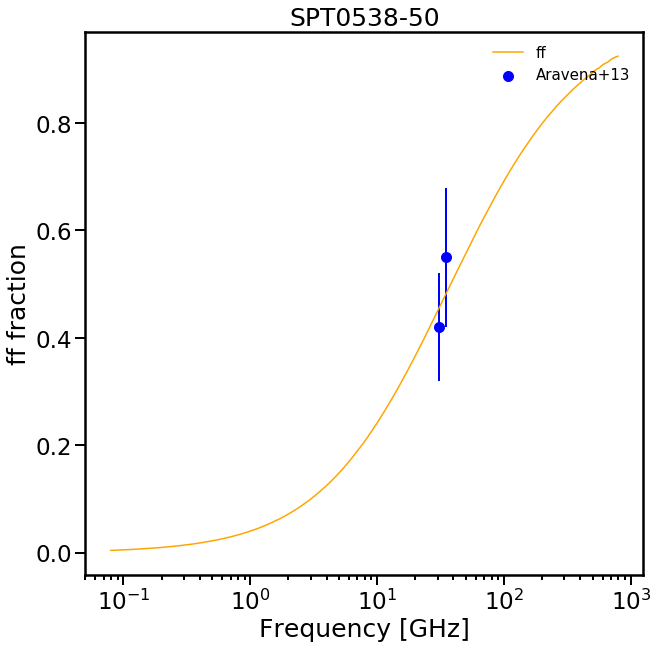

In [9]:
plt.figure(figsize=(10,10))
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['axes.linewidth'] = 2.5

plt.plot(freq[2932:], ff_fraction, color='orange', label='ff')

#Aravena points
plt.scatter(obsfreq, [.42, .55], color='blue', marker='o', s=100, label='Aravena+13')
plt.errorbar(obsfreq, [.42, .55], yerr=[.1, .13], fmt='none', ls=None, lw=2, color='blue', label=None)
#plot parameters
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency [GHz]', fontsize=25)
plt.ylabel('ff fraction', fontsize=25)
#plt.ylim([1e-1, 1e3])
#plt.xlim([4e-1, 2e6])
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=4.5, width=2, which='minor')
plt.legend(loc='upper right', fontsize=15, frameon=False)
plt.title('SPT0538-50', fontsize=25)